# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [3]:
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.67085331 2.520928   2.2593742  2.70900717 2.2234824  2.52135105
 2.69971667 2.71396351 2.15883295 2.86420983]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [69]:
def unif_distr_rand_num_with_boundaries(bottom, ceiling, count):
    
    from scipy.stats import uniform
    
    x = uniform.rvs(size=count)
    b = bottom
    c = ceiling
    
    randoms  = b + (c-b)*x
   
    return randoms

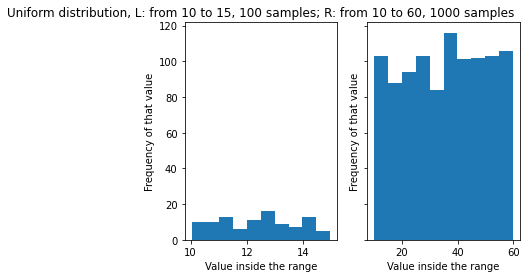

In [258]:
from matplotlib import pyplot as plt

case1 = unif_distr_rand_num_with_boundaries(10, 15, 100)
case2 = unif_distr_rand_num_with_boundaries(10, 60, 1000)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(case1, bins = 10)
ax2.hist(case2, bins = 10)
ax1.set_xlabel("Value inside the range")
ax2.set_xlabel("Value inside the range")
ax1.set_ylabel("Frequency of that value")
ax2.set_ylabel("Frequency of that value")
ax1.set_title("Uniform distribution, L: from 10 to 15, 100 samples; R: from 10 to 60, 1000 samples")
plt.show()

How are the two distributions different?

The bigger the sample, the higher the frequency of the values. In addition, the higher sample also means the distribution becomes flatter (if we put the left plot on its scale, we can see more difference between the two).

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

In [129]:
def norm_distr_rand_num(loc, scale, count):
    
    from scipy.stats import norm
    
    my_normal = norm(loc, scale)
    sample = my_normal.rvs(count)
   
    return sample

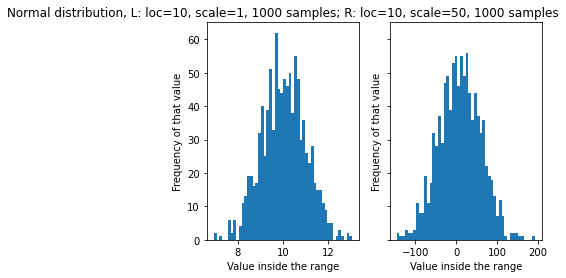

In [139]:
case1 = norm_distr_rand_num(10, 1, 1000)
case2 = norm_distr_rand_num(10, 50, 1000)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(case1, bins = 50)
ax2.hist(case2, bins = 50)
ax1.set_xlabel("Value inside the range")
ax2.set_xlabel("Value inside the range")
ax1.set_ylabel("Frequency of that value")
ax2.set_ylabel("Frequency of that value")
ax1.set_title("Normal distribution, L: loc=10, scale=1, 1000 samples; R: loc=10, scale=50, 1000 samples")
plt.show()

How are the two distributions different?

Because the standard deviation of the second plot is much higher than the first one, the values along its distribution are more dispersed. This can be seen by checking the range of values in the X axis.

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.
Then plot the histograms for the following variables:

In [148]:
import pandas as pd
import seaborn as sns
vehicles = pd.read_csv("vehicles.csv")

In [259]:
vehicles.sample()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
12281,Ford,Escort Wagon,1991,1.9,4.0,Manual 5-spd,Front-Wheel Drive,Small Station Wagons,Regular,11.771786,25,33,28,317.392857,1200


In [205]:
import statistics
from statsmodels.graphics.gofplots import qqplot

1. Fuel Barrels/Year

In [195]:
mean1 = statistics.mean(vehicles["Fuel Barrels/Year"])
median1 = statistics.median(vehicles["Fuel Barrels/Year"])
mode1 = statistics.mode(vehicles["Fuel Barrels/Year"])

The mode is 18.311666666666667, the median is 17.347894736842107 and the mean is 17.609055502328133


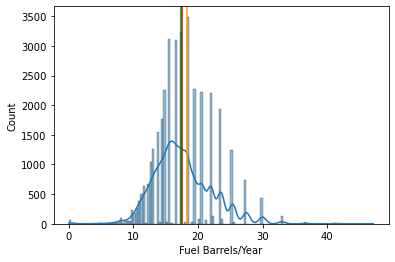

In [212]:
fig = sns.histplot(data=vehicles, x="Fuel Barrels/Year", kde=True);
fig.axvline(x = mean1, color="red")
fig.axvline(x = median1, color="green")
fig.axvline(x = mode1, color="orange")
print(f"The mode is {mode1}, the median is {median1} and the mean is {mean1}")

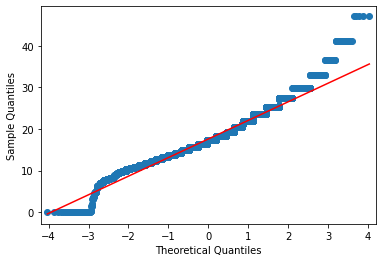

In [207]:
qqplot(vehicles["Fuel Barrels/Year"], line='s')
plt.show()

2. CO2 Emission Grams/Mile 

In [189]:
mean2 = statistics.mean(vehicles["CO2 Emission Grams/Mile"])
median2 = statistics.median(vehicles["CO2 Emission Grams/Mile"])
mode2 = statistics.mode(vehicles["CO2 Emission Grams/Mile"])

The mode is 493.72222222222223, the median is 467.7368421052632 and the mean is 475.31633925721235


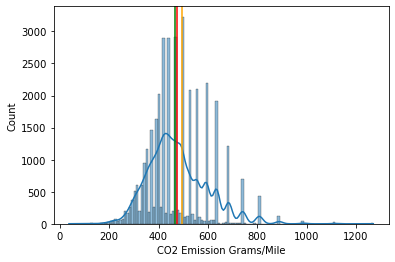

In [211]:
fig = sns.histplot(data=vehicles, x="CO2 Emission Grams/Mile", kde=True);
fig.axvline(x = mean2, color="red")
fig.axvline(x = median2, color="green")
fig.axvline(x = mode2, color="orange")
print(f"The mode is {mode2}, the median is {median2} and the mean is {mean2}")

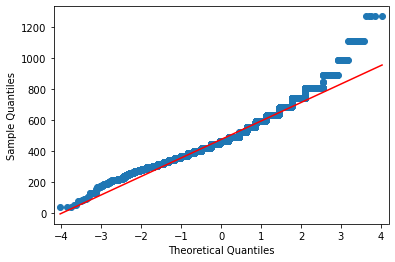

In [208]:
qqplot(vehicles["CO2 Emission Grams/Mile"], line='s')
plt.show()

3. Combined MPG

In [191]:
mean3 = statistics.mean(vehicles["Combined MPG"])
median3 = statistics.median(vehicles["Combined MPG"])
mode3 = statistics.mode(vehicles["Combined MPG"])

The mode is 18, the median is 19.0 and the mean is 19.92932242990654


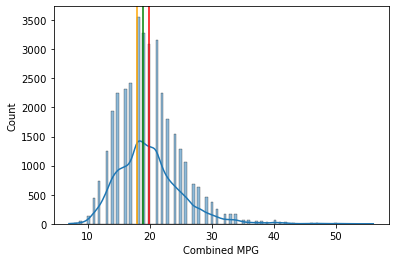

In [210]:
fig = sns.histplot(data=vehicles, x="Combined MPG", kde=True);
fig.axvline(x = mean3, color="red")
fig.axvline(x = median3, color="green")
fig.axvline(x = mode3, color="orange")
print(f"The mode is {mode3}, the median is {median3} and the mean is {mean3}")

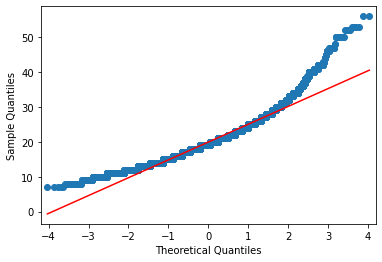

In [209]:
qqplot(vehicles["Combined MPG"], line='s')
plt.show()

Which one(s) of the variables are nearly normally distributed? How do you know?

None of them are normal distributed. A normal distribution has many properties. Some of them are:
    
- The frequency of the values should tend to the mean values, not the edges
- It should have 1 mode, which sould coincide with its mean and median
- The teoretical quantiles (test Q-Q) should follow a linear pattern

If we look at the results of each plot, each of them have gaps in their data (it seems they are discrete), or are more distributed outside the mean, and neither of them pass the Q-Q test. However, for the purpose of this work, we might say that the last seem the have the data more equally distributed, so it's more likea a normal-like distribution.

More tests can be performed to conclude if they are normal or not, such as the Shapiro.

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 2 and 200. 

1. Use the function to generate two number sequences with the size of 1000 for both.

1. Plot the distributions as histograms with the nubmer of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

In [232]:
def exp_distr_rand_num(scale, count):
    
    import numpy as np
     
    randomsample = np.random.exponential(scale, count)
   
    return randomsample

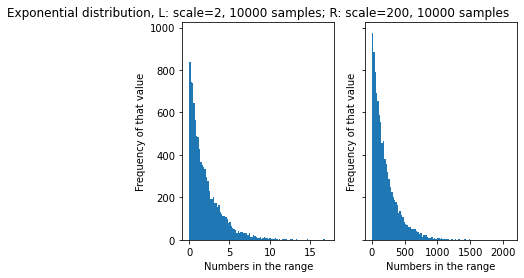

In [236]:
case1 = exp_distr_rand_num(2, 10000)
case2 = exp_distr_rand_num(200, 10000)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(case1, bins = 100)
ax2.hist(case2, bins = 100)
ax1.set_xlabel("Numbers in the range")
ax2.set_xlabel("Numbers in the range")
ax1.set_ylabel("Frequency of that value")
ax2.set_ylabel("Frequency of that value")
ax1.set_title("Exponential distribution, L: scale=2, 10000 samples; R: scale=200, 10000 samples")
plt.show()

How are the two distributions different?

If the mean changes, the distribution also changes

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [262]:
from scipy.stats import expon

my_exp = expon(scale=10)
problessfift = round(my_exp.cdf(15),3)
print(f"The probability that a customer will spend less than 15 minutes is {problessfift}")

The probability that a customer will spend less than 15 minutes is 0.777


What is the probability that the customer will spend more than 15 minutes

In [263]:
probmorefift = round(1 - problessfift,3)
print(f"The probability that a customer will spend more than 15 minutes is {probmorefift}")

The probability that a customer will spend more than 15 minutes is 0.223
